# Building a Dataset

In this notebook we will explore how we can build a `Dataset` for interfacing with a dataset.

## 00. Getting Started

Lets download a the Fashion MNIST dataset from https://github.com/zalandoresearch/fashion-mnist.

In [38]:
!pip install opencv-python
!pip install tqdm
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import cv2
import gzip
import urllib
import numpy as np
from tqdm import tqdm
from pathlib import Path
from typing import *

# URLs for MNIST dataset
base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
files = {
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}

# Specify the output directory
dataset_dir = Path("../data/datasets")
dataset_dir.mkdir(parents=True, exist_ok=True)

# Download the files
for key, filename in files.items():
    src = base_url + filename # source url
    dst = dataset_dir.joinpath(filename) # destination file
    if not dst.exists():
        urllib.request.urlretrieve(src, dst)

# extract the images and save them
imgs = dataset_dir.joinpath(files["test_images"])
with gzip.open(imgs, "rb") as file:
    imgs = np.frombuffer(file.read(), np.uint8, offset=16)
    imgs = imgs.reshape(-1,28,28)

# extract the labels and save them
lbls = dataset_dir.joinpath(files["test_labels"])
with gzip.open(lbls, "rb") as file:
    lbls = np.frombuffer(file.read(), np.uint8, offset=8)
    
# lets export them into a specific structure : just use the first 10 for the sake of it
for idx in range(10):
    # create a subdirectory
    idx_dir = dataset_dir.joinpath(str(idx))
    idx_dir.mkdir(exist_ok=True, parents=True)

    # save the image using cv2
    cv2.imwrite(idx_dir.joinpath(f"img.png"), imgs[idx])

    # save the labe in plain text
    with open(idx_dir.joinpath("label.txt"), "w") as f:
        f.writelines([str(lbls[idx])])

## 01. Introduction

Spend some time exploring the structure of the dataset using `pathlib`.

In [43]:
#
p = Path("../data/datasets")
print(p.exists())

True


### Activity

Create a regular expression that allows you to get all of the sample directories i.e. `<idx>/` in the dataset.

In [47]:
# define the root directory
p = Path("../data/datasets")

# create a regular expression and `.glob` to access the sample directories i.e. <idx>/
for path in p.glob("?"):
    print(path)

..\data\datasets\0
..\data\datasets\1
..\data\datasets\2
..\data\datasets\3
..\data\datasets\4
..\data\datasets\5
..\data\datasets\6
..\data\datasets\7
..\data\datasets\8
..\data\datasets\9


## 02. Building an Index

We're now going to build our own dataset that we can use to iterate over the items in the dataset. First, lets load all of the sample directories into a `List`, we will call this our index.

In [51]:
# store the samples in a list
samples = list(p.glob("?"))
samples

[WindowsPath('../data/datasets/0'),
 WindowsPath('../data/datasets/1'),
 WindowsPath('../data/datasets/2'),
 WindowsPath('../data/datasets/3'),
 WindowsPath('../data/datasets/4'),
 WindowsPath('../data/datasets/5'),
 WindowsPath('../data/datasets/6'),
 WindowsPath('../data/datasets/7'),
 WindowsPath('../data/datasets/8'),
 WindowsPath('../data/datasets/9')]

In [53]:
# custom generator
class FashionMnist:
    def __init__(self, samples: List[Path]) -> None:
        super(FashionMnist, self).__init__()
        self.samples = samples
        assert isinstance(self.samples, List)
        assert len(self.samples) > 0
        assert isinstance(self.samples[0], Path)

    def __iter__(self) -> Tuple[str, str]:
        samples = self.samples
        for sample in samples:
            # construct the filepaths of the data
            img_filepath = sample.joinpath("img.png")
            lbl_filepath = sample.joinpath("lbl.txt")

            yield img_filepath, lbl_filepath

In [54]:
# initialize the dataset with the files you provided
dataset = FashionMnist(samples)

# iterate over the dataset
for items in dataset:
    print(items)

(WindowsPath('../data/datasets/0/img.png'), WindowsPath('../data/datasets/0/lbl.txt'))
(WindowsPath('../data/datasets/1/img.png'), WindowsPath('../data/datasets/1/lbl.txt'))
(WindowsPath('../data/datasets/2/img.png'), WindowsPath('../data/datasets/2/lbl.txt'))
(WindowsPath('../data/datasets/3/img.png'), WindowsPath('../data/datasets/3/lbl.txt'))
(WindowsPath('../data/datasets/4/img.png'), WindowsPath('../data/datasets/4/lbl.txt'))
(WindowsPath('../data/datasets/5/img.png'), WindowsPath('../data/datasets/5/lbl.txt'))
(WindowsPath('../data/datasets/6/img.png'), WindowsPath('../data/datasets/6/lbl.txt'))
(WindowsPath('../data/datasets/7/img.png'), WindowsPath('../data/datasets/7/lbl.txt'))
(WindowsPath('../data/datasets/8/img.png'), WindowsPath('../data/datasets/8/lbl.txt'))
(WindowsPath('../data/datasets/9/img.png'), WindowsPath('../data/datasets/9/lbl.txt'))


## 03. Accessing the Dataset

Now we have a way to programatically access each set of files in the dataset, lets write some functions to read the data from the files and return this.

True


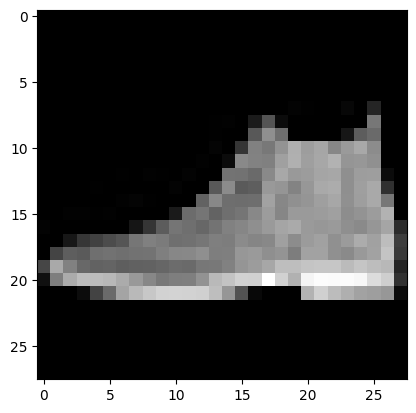

In [ ]:
# create a function to read the image
img_filepath = Path("../data/datasets/0/img.png")
print(img_filepath.exists())

# import cv2

# img = cv2.imread(img_filepath)
# # print(img)


# import matplotlib.pyplot as plt
# plt.imshow(img)


def read_image(path: str) -> Any:
    img = cv2.imread(path)
    return img

# read the image using the function
img = read_image(img_filepath)

# plot the image
plt.imshow(img)

In [63]:
# create a function to read the label
lbl_filepath = Path("../data/datasets/0/label.txt")

# import pandas as pd
# pd.read_csv(lbl_filepath)

# with open(lbl_filepath, "r") as file:
#     data = file.read()
#     print(data)


def read_label(path: str) -> Any:
    with open(path, "r") as file:
        data = file.read()
    return data

# read the label using the function
lbl = read_label(lbl_filepath)

# plot the image
print(lbl)

9


## 04. Putting it Together

Now we have a way to retrieve the directories in the dataset and to read each type of file, lets pull this together into a single class we can use.

In [67]:
# custom generator
class FashionMnist:
    def __init__(self, samples: List[Path]) -> None:
        super(FashionMnist, self).__init__()
        self.samples = samples
        assert isinstance(self.samples, List)
        assert len(self.samples) > 0
        assert isinstance(self.samples[0], Path)

    def __iter__(self) -> Tuple[Any, str]:
        samples = self.samples
        for sample in samples:
            # construct the filepaths of the data
            img_filepath = sample.joinpath("img.png")
            lbl_filepath = sample.joinpath("label.txt")

            # read the data
            img = read_image(img_filepath)
            lbl = read_label(lbl_filepath)

            # yield the data
            yield img, lbl


In [70]:
# initialize the dataset
p = Path("../data/datasets")
samples = list(p.glob("[1-3]"))
# print(samples)


dataset = FashionMnist(samples)

# iterate over the dataset
for idx, (img, lbl) in enumerate(dataset):
    # create a plot to display the image and label
    print(idx, lbl, img.shape)

0 2 (28, 28, 3)
1 1 (28, 28, 3)
2 1 (28, 28, 3)
